In [1]:
import pandas as pd
from datetime import datetime, timedelta

test_data_split = 230  #this will be the number of weeks in the test data set, remainder of data in train data set
#Calculate the split date to use
split_date = datetime.now() - timedelta(weeks=test_data_split) 
print('Split Date: {0}'.format(split_date))

Split Date: 2015-11-25 21:27:54.990922


In [2]:
#Read in the transportation data, monthly seasonally adjusted
tsi_data = pd.read_excel(".\data\Input_SeasonalData_TSI.xlsx", header=2)

#look at the data types that were inferred by Pandas during import.
tsi_data.dtypes

OBS_DATE                   datetime64[ns]
RAIL_FRT_CARLOADS_D11               int64
RAIL_FRT_INTERMODAL_D11             int64
WATERBORNE_D11                    float64
TRUCK_D11                         float64
AIR_RTMFM_D11                       int64
TSI                               float64
dtype: object

In [3]:
#Return a listing of the data
tsi_data.head()

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI
0,2000-01-01,1422442,764756,55.4,80.3,2466950,105.3
1,2000-02-01,1425882,767958,48.6,79.8,2521852,104.4
2,2000-03-01,1411458,763858,52.5,74.1,2489787,99.2
3,2000-04-01,1400311,764144,50.8,72.8,2557332,98.1
4,2000-05-01,1405169,763843,52.5,73.0,2527821,98.6


In [4]:
#Read in the real gdp growth rates,seasonally adjusted, quarterly data with quarterly growth rates
gdp_data = pd.read_excel(".\data\Input_GDP_st_louis_fed_quarterly_change.xlsx")

#look at the data types that were inferred by Pandas during import.
gdp_data.dtypes

observation_date       datetime64[ns]
Real_gdp_qtr_growth           float64
dtype: object

In [5]:
#Disply a listing of the data
gdp_data.head()

,observation_date,Real_gdp_qtr_growth
0,2000-01-01,1.5
1,2000-04-01,7.5
2,2000-07-01,0.5
3,2000-10-01,2.5
4,2001-01-01,-1.1


In [6]:
#Merge the 2 datasets together based on the date. 
merged_data = pd.merge(tsi_data, gdp_data, how='left', left_on='OBS_DATE', right_on='observation_date')

merged_data.head()

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI,observation_date,Real_gdp_qtr_growth
0,2000-01-01,1422442,764756,55.4,80.3,2466950,105.3,2000-01-01,1.5
1,2000-02-01,1425882,767958,48.6,79.8,2521852,104.4,NaT,NaN
2,2000-03-01,1411458,763858,52.5,74.1,2489787,99.2,NaT,NaN
3,2000-04-01,1400311,764144,50.8,72.8,2557332,98.1,2000-04-01,7.5
4,2000-05-01,1405169,763843,52.5,73.0,2527821,98.6,NaT,NaN


In [7]:
#We now have 2 date columns.  Drop the date column from the gdp_data dataframe.
merged_data = merged_data.drop(['observation_date'], axis=1) #pandas can drop rows or columns, axis=1 indicates columns

In [8]:
#This now shows the dataframe without the duplicate date column observation_date.
merged_data.head()

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI,Real_gdp_qtr_growth
0,2000-01-01,1422442,764756,55.4,80.3,2466950,105.3,1.5
1,2000-02-01,1425882,767958,48.6,79.8,2521852,104.4,NaN
2,2000-03-01,1411458,763858,52.5,74.1,2489787,99.2,NaN
3,2000-04-01,1400311,764144,50.8,72.8,2557332,98.1,7.5
4,2000-05-01,1405169,763843,52.5,73.0,2527821,98.6,NaN


In [9]:
#Look at the counts for the data values that we have for each column.  We see the gdp data with a smaller number since
#it is quarterly and the other data is monthly.
merged_data.count()

OBS_DATE                   241
RAIL_FRT_CARLOADS_D11      241
RAIL_FRT_INTERMODAL_D11    241
WATERBORNE_D11             241
TRUCK_D11                  241
AIR_RTMFM_D11              241
TSI                        241
Real_gdp_qtr_growth         80
dtype: int64

In [10]:
#Forward fill the gdp data so that a quarterly gdp value will be used for 3 rows, with each row being a month.
#limit it only fill in 2 consective missing values.
merged_data['Real_gdp_qtr_growth'] = merged_data['Real_gdp_qtr_growth'].fillna(method='ffill', limit=2)

merged_data.head()

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI,Real_gdp_qtr_growth
0,2000-01-01,1422442,764756,55.4,80.3,2466950,105.3,1.5
1,2000-02-01,1425882,767958,48.6,79.8,2521852,104.4,1.5
2,2000-03-01,1411458,763858,52.5,74.1,2489787,99.2,1.5
3,2000-04-01,1400311,764144,50.8,72.8,2557332,98.1,7.5
4,2000-05-01,1405169,763843,52.5,73.0,2527821,98.6,7.5


In [11]:
#Look to see if we still have missing gdp values as that data gets released later than the transportation data.
#This will allow us to inspect any bad rows.
merged_data.loc[merged_data['Real_gdp_qtr_growth'].isnull()]

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI,Real_gdp_qtr_growth
240,2020-01-01,1054432,1109662,50.4,116.6,3617962,136.9,NaN


In [12]:
#drop rows where we don't have a gdp value
merged_data = merged_data.dropna(subset=['Real_gdp_qtr_growth'])

In [13]:
#Verify that all rows have gdp values 
merged_data.loc[merged_data['Real_gdp_qtr_growth'].isnull()]

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI,Real_gdp_qtr_growth


In [14]:
#We should now have clean data.
merged_data.count()

OBS_DATE                   240
RAIL_FRT_CARLOADS_D11      240
RAIL_FRT_INTERMODAL_D11    240
WATERBORNE_D11             240
TRUCK_D11                  240
AIR_RTMFM_D11              240
TSI                        240
Real_gdp_qtr_growth        240
dtype: int64

In [15]:
#Create a boolean column to indicate if gdp growth was positive or negative.
merged_data['gdp_is_increasing'] = merged_data.apply(lambda x: True if x['Real_gdp_qtr_growth'] > 0.0 else False, axis=1)

In [16]:
merged_data.count()

OBS_DATE                   240
RAIL_FRT_CARLOADS_D11      240
RAIL_FRT_INTERMODAL_D11    240
WATERBORNE_D11             240
TRUCK_D11                  240
AIR_RTMFM_D11              240
TSI                        240
Real_gdp_qtr_growth        240
gdp_is_increasing          240
dtype: int64

In [17]:
#look at the new column
merged_data.head()

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI,Real_gdp_qtr_growth,gdp_is_increasing
0,2000-01-01,1422442,764756,55.4,80.3,2466950,105.3,1.5,True
1,2000-02-01,1425882,767958,48.6,79.8,2521852,104.4,1.5,True
2,2000-03-01,1411458,763858,52.5,74.1,2489787,99.2,1.5,True
3,2000-04-01,1400311,764144,50.8,72.8,2557332,98.1,7.5,True
4,2000-05-01,1405169,763843,52.5,73.0,2527821,98.6,7.5,True


In [18]:
#Look at rows where gdp growth was negative
merged_data.loc[merged_data['Real_gdp_qtr_growth'] <= 0.0]

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI,Real_gdp_qtr_growth,gdp_is_increasing
12,2001-01-01,1398488,759514,46.0,74.8,2553409,99.5,-1.1,False
13,2001-02-01,1399176,743794,47.6,75.3,2547226,99.9,-1.1,False
14,2001-03-01,1416765,754615,47.0,74.2,2479860,99.1,-1.1,False
18,2001-07-01,1353431,731670,47.6,74.1,2246636,97.6,-1.7,False
19,2001-08-01,1374005,745111,49.3,75.2,2318149,99.2,-1.7,False
20,2001-09-01,1376994,754272,49.0,74.4,2047594,98.1,-1.7,False
96,2008-01-01,1416854,985481,45.1,87.5,3366557,113.4,-2.3,False
97,2008-02-01,1423289,998459,43.1,85.8,3289484,111.5,-2.3,False
98,2008-03-01,1402813,971721,36.7,85.8,3249574,109.8,-2.3,False
102,2008-07-01,1427847,986893,42.5,86.2,3126320,111.1,-2.1,False


In [19]:
merged_data.head()

,OBS_DATE,RAIL_FRT_CARLOADS_D11,RAIL_FRT_INTERMODAL_D11,WATERBORNE_D11,TRUCK_D11,AIR_RTMFM_D11,TSI,Real_gdp_qtr_growth,gdp_is_increasing
0,2000-01-01,1422442,764756,55.4,80.3,2466950,105.3,1.5,True
1,2000-02-01,1425882,767958,48.6,79.8,2521852,104.4,1.5,True
2,2000-03-01,1411458,763858,52.5,74.1,2489787,99.2,1.5,True
3,2000-04-01,1400311,764144,50.8,72.8,2557332,98.1,7.5,True
4,2000-05-01,1405169,763843,52.5,73.0,2527821,98.6,7.5,True


In [20]:
merged_data['RAIL_FRT_PCT'] = merged_data['RAIL_FRT_CARLOADS_D11'].pct_change()
merged_data['RAIL_INTERMOD_PCT'] = merged_data['RAIL_FRT_INTERMODAL_D11'].pct_change()
merged_data['WATERBORNE_PCT'] = merged_data['WATERBORNE_D11'].pct_change()
merged_data['TRUCK_PCT'] = merged_data['TRUCK_D11'].pct_change()
merged_data['AIR_RTMFM_PCT'] = merged_data['AIR_RTMFM_D11'].pct_change()
merged_data['TSI_PCT'] = merged_data['TSI'].pct_change()

In [21]:
#create x_train and y_train dataframes
x_train = merged_data.loc[merged_data['OBS_DATE'] < split_date, 'RAIL_FRT_PCT':'TSI_PCT']
x_train.drop([0], inplace=True) #drop first row as it will have NA for pct_change values
y_train_class = merged_data.loc[merged_data['OBS_DATE'] < split_date, 'gdp_is_increasing'] #ydata for classifier models
y_train_class.drop([0], inplace=True) #drop first row as it will have NA for pct_change values
y_train_rate = merged_data.loc[merged_data['OBS_DATE'] < split_date, 'Real_gdp_qtr_growth'] #y data for regression models
y_train_rate.drop([0], inplace=True) #drop first row as it will have NA for pct_change values

print('x_train row count: {0}'.format(len(x_train.index)))
print('y_train_class row count: {0}'.format(len(y_train_class.index)))
print('y_train_rate row count: {0}'.format(len(y_train_rate.index)))

x_test = merged_data.loc[merged_data['OBS_DATE'] >= split_date, 'RAIL_FRT_PCT':'TSI_PCT']
y_test_class = merged_data.loc[merged_data['OBS_DATE'] >= split_date, 'gdp_is_increasing']
y_test_rate = merged_data.loc[merged_data['OBS_DATE'] >= split_date, 'Real_gdp_qtr_growth']

print('x_test row count: {0}'.format(len(x_test.index)))
print('y_test_class row count: {0}'.format(len(y_test_class.index)))
print('y_test_rate row count: {0}'.format(len(y_test_rate.index)))

x_train row count: 190
y_train_class row count: 190
y_train_rate row count: 190
x_test row count: 49
y_test_class row count: 49
y_test_rate row count: 49


In [22]:
#x_train

In [23]:
from sklearn import preprocessing

#mm_scaler = preprocessing.MinMaxScaler()
std_scaler = preprocessing.StandardScaler()

#x_train_minmax = mm_scaler.fit_transform(x_train)
x_train_normalized = std_scaler.fit_transform(x_train)

#x_test_minmax = mm_scaler.transform(x_test)
x_test_normalized = std_scaler.transform(x_test)

In [24]:
x_train_normalized

array([[ 0.17103562,  0.07966171, -2.36648807, -0.4792767 ,  0.55497401,
        -0.74560377],
       [-0.45375797, -0.32501187,  1.52840508, -4.6520716 , -0.38757531,
        -4.03315615],
       [-0.34318048, -0.08230226, -0.63264825, -1.20355589,  0.68633884,
        -0.94811681],
       ...,
       [-0.27010472, -0.47358429,  0.06762417, -0.20751212,  0.70164874,
        -0.06461078],
       [-0.18324352, -0.83120189, -0.87634967, -0.14427345, -0.06315005,
        -0.32329967],
       [-2.30165556, -0.5625867 ,  0.52393817, -0.71631497, -0.2932495 ,
        -1.23250267]])

In [25]:
#x_test_normalized

In [26]:
y_train_class.head()

1    True
2    True
3    True
4    True
5    True
Name: gdp_is_increasing, dtype: bool

Training data score: 0.83
Training average precision score: 0.86
Training precision score: 0.86
Training recall score: 0.96
Training f1 score: 0.91


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

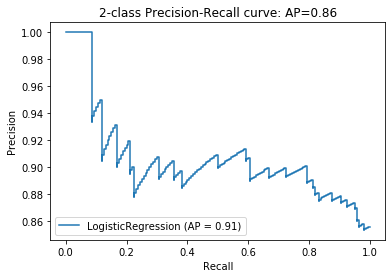

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

#load the model
clf = LogisticRegression(solver='liblinear', class_weight={True:0.3, False:0.7}) #, multi_class='ovr')    liblinear
#fit the model
logreg = clf.fit(x_train_normalized, y_train_class)
print('Training data score: {0:0.2f}'.format(clf.score(x_train_normalized, y_train_class)))

y_hat_train_class = clf.predict(x_train_normalized)
#print('Classifier training accuracy: {0}'.format(np.average(y_hat_train_class == y_train_class)))

avg_precision = average_precision_score(y_train_class, y_hat_train_class)
print('Training average precision score: {0:0.2f}'.format(avg_precision))

precision = precision_score(y_train_class, y_hat_train_class)
print('Training precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_train_class, y_hat_train_class)
print('Training recall score: {0:0.2f}'.format(recall))

f1_score = f1_score(y_train_class, y_hat_train_class)
print('Training f1 score: {0:0.2f}'.format(f1_score))


disp = plot_precision_recall_curve(clf, x_train_normalized, y_train_class)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(avg_precision))


In [64]:
y_hat_train_class

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [65]:
y_train_class.to_numpy()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Classifier test data score: 0.94
Test average precision score: 1.00
Test precision score: 1.00
Test recall score: 0.94
Test f1 score: 0.97


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

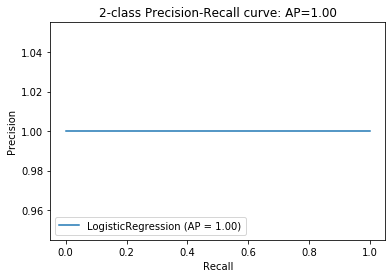

In [66]:
from sklearn.metrics import f1_score

#evaluate the model by using a test set
y_hat_test_class = clf.predict(x_test_normalized)
print('Classifier test data score: {0:0.2f}'.format(clf.score(x_test_normalized, y_test_class)))
#print the accuracy
#print('Classifier test accuracy: {0}'.format(np.average(y_hat_test_class == y_test_class)))

avg_precision = average_precision_score(y_test_class, y_hat_test_class)
print('Test average precision score: {0:0.2f}'.format(avg_precision))

precision = precision_score(y_test_class, y_hat_test_class)
print('Test precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_test_class, y_hat_test_class)
print('Test recall score: {0:0.2f}'.format(recall))

f1_score_val = f1_score(y_test_class, y_hat_test_class)
print('Test f1 score: {0:0.2f}'.format(f1_score_val))


disp = plot_precision_recall_curve(clf, x_test_normalized, y_test_class)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(avg_precision))



In [67]:
y_hat_test_class

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [68]:
y_test_class.to_numpy()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
#y_test

In [ ]:
#merged_data

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin = LinearRegression() 

reg = lin.fit(x_train_normalized, y_train_rate)
r2coeffofdet = lin.score(x_train_normalized, y_train_rate)

print('R2 score:', r2coeffofdet)   # This is the coefficient of determination.

y_hat_train_rate = reg.predict(x_train_normalized)

RMSE = np.sqrt(mean_squared_error(y_train_rate, y_hat_train_rate))
print('RMSE:', RMSE)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

R2 score: 0.11512538137391592
RMSE: 2.382026735271547
Coefficients: [-0.14068072  0.59162123 -0.13889845 -0.15291822  0.45782416  0.56441147]
Intercept: 1.9684210526315788


In [71]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 2) 
x_train_normalized_poly = poly.fit_transform(x_train_normalized)

poly.fit(x_train_normalized_poly, y_train_rate)

lin_poly = LinearRegression()

reg_poly = lin_poly.fit(x_train_normalized_poly, y_train_rate)

r2coeffofdet = lin_poly.score(x_train_normalized_poly, y_train_rate)
print('R2 score:', r2coeffofdet)   # This is the coefficient of determination.

y_hat_train_rate_poly = reg_poly.predict(x_train_normalized_poly)

RMSE = np.sqrt(mean_squared_error(y_train_rate, y_hat_train_rate_poly))
print('RMSE:', RMSE)

print('Coefficients:', reg_poly.coef_)
print('Intercept:', reg_poly.intercept_)

R2 score: -1.2516004686181055
RMSE: 3.7997185380418395
Coefficients: [ 6.70159794e+13  9.80968100e-02  1.91325728e+00  1.63511147e+00
  3.99477160e+00  1.31353667e+00 -6.22668264e+00  1.97369356e+00
 -9.13891980e-01  6.03312611e-02  3.15924841e+00  1.80685662e+00
 -5.41144571e+00 -6.11265185e-02  2.16512911e+00  5.72306713e+00
  1.07979253e+00 -4.77863582e+00 -2.22632996e+00 -7.57656132e+00
 -2.04639927e+00  1.03886659e+01 -5.36415038e+00 -4.74206172e+00
  1.48117872e+01  3.82074022e-02  3.36832873e+00 -9.39645679e+00]
Intercept: -67015979367971.48


In [72]:
y_hat_train_rate_poly

array([  1.09375  ,   0.46875  ,   5.578125 ,   1.078125 ,  -0.4921875,
         5.671875 ,  -5.671875 ,   7.390625 ,   4.9453125,  -0.0703125,
        -5.6875   ,   2.7421875,  -1.4921875,  -1.6953125,  -1.1796875,
         0.1328125,   4.1328125,   5.875    ,   0.9765625,  -2.546875 ,
         3.90625  ,   1.3828125,   0.75     ,   1.7421875,   5.25     ,
         7.8515625,  -0.4453125,   3.2109375,   2.0234375,   1.3125   ,
         3.6328125,   0.8359375,  -1.140625 ,   2.3046875,   1.6640625,
         5.21875  ,   0.3828125,   2.0625   ,   1.9765625,   3.703125 ,
         3.59375  ,  -0.953125 ,   3.0078125,   4.7421875,   0.       ,
         3.9140625,   4.2578125,   3.1796875,   1.7734375,  11.34375  ,
         1.7421875,   2.625    ,   3.59375  ,   3.8828125,   0.21875  ,
         0.0546875,   2.9140625,   1.234375 ,   3.078125 ,  -1.2890625,
         1.078125 ,  -1.59375  ,   1.6015625,   4.765625 ,   1.9921875,
         0.984375 ,   3.140625 ,   5.0390625,   7.78125  ,  -1.3

In [73]:
y_train_rate

1      1.5
2      1.5
3      7.5
4      7.5
5      7.5
      ... 
186    1.3
187    1.3
188    1.3
189    0.1
190    0.1
Name: Real_gdp_qtr_growth, Length: 190, dtype: float64